# K-Nearest Neighbor 2

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Load data

In [2]:
# Read data from file (breast_cancer_diagnosis.csv) into dataframe
df = pd.read_csv("data/breast_cancer_diagnosis.csv")
df.shape

(569, 13)

In [3]:
df.head()

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,ID842302,Glynnis Munson,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,ID842517,Lana Behrer,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,ID84300903,Devondra Vanvalkenburgh,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,ID84348301,Glory Maravalle,NaN,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,ID84358402,Mellie Mccurdy,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


### Prepare data

In [4]:
# Check for missing values
df.isnull().sum()

id                    0
name                  0
radius               71
texture               0
perimeter             0
area                  0
smoothness            0
compactness           0
concavity             0
symmetry              0
fractal_dimension     0
age                   0
diagnosis             0
dtype: int64

In [5]:
# Replace missing values with column average
df["radius"].fillna(df["radius"].mean(), inplace=True)

In [6]:
# Recheck for missing values
df.isnull().sum()

id                   0
name                 0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
symmetry             0
fractal_dimension    0
age                  0
diagnosis            0
dtype: int64

In [7]:
# Drop non-numeric variables
df.drop(["id", "name"], axis=1, inplace=True)
df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,14.326635,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,20.570000,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,19.690000,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,14.326635,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,20.290000,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


### Separate independent and dependent variables

In [8]:
X = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

### Split data into training and test sets

In [9]:
# Split data into training data (70%) and test data (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Train model (using default hyperparameters)

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Calculate accuracy score

In [11]:
y_pred=knn.predict(X_test)
print(f"Accuracy = {round((accuracy_score(y_test, y_pred) * 100), 2)}%")

Accuracy = 90.64%


### Find best k value

In [12]:
# Set up array of possible k values
possible_k = [3,5,7,9,11,13,15]

In [13]:
# Calculate accuracy for each k value
ac_scores=[]
for k in possible_k:
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', metric='cosine')
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores=accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
print ("Accuracy Scores :", ac_scores)

Accuracy Scores : [0.8888888888888888, 0.8947368421052632, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888]


In [14]:
# Calculate the error
error = [1-x for x in ac_scores]
print ("Error :", error)

Error : [0.11111111111111116, 0.10526315789473684, 0.11111111111111116, 0.11111111111111116, 0.11111111111111116, 0.11111111111111116, 0.11111111111111116]


In [15]:
i = error.index(min(error))
best_k = possible_k[i]
print ("Best value of k is", best_k)

Best value of k is 5


### Plot error vs k

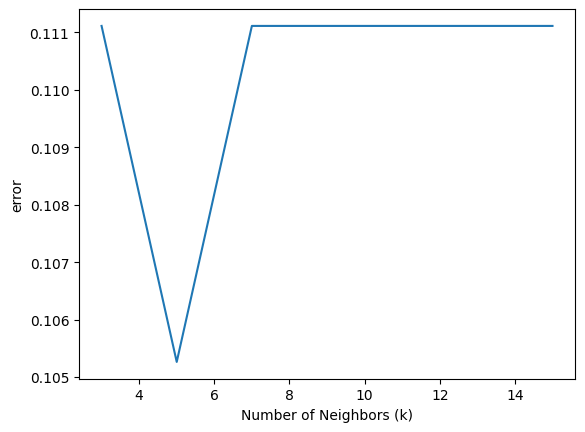

In [16]:
plt.plot(possible_k, error)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("error")
plt.show()